In [1]:
import pandas as pd

# replace with your path
path = '/Users/brunobarbieri/Library/CloudStorage/OneDrive-UniversityofPisa/TA_Project/data/'
# df = pd.read_csv(path + 'en_lyrics.csv')

In [ ]:
# df = df.drop(
#     columns= [
#         'id',
#         'language_cld3', 'language_ft', 'language'
#     ]
# )

In [ ]:
# write the modified dataset in a csv file
# df.to_csv(path + 'drop_dataset.csv', index=False)
# df

,title,tag,artist,year,views,features,lyrics
0,Killa Cam,rap,Cam'ron,2004,173166,"{""Cam\\'ron"",""Opera Steve""}","[Chorus: Opera Steve & Cam'ron]\nKilla Cam, Ki..."
1,Can I Live,rap,JAY-Z,1996,468624,{},"[Produced by Irv Gotti]\n\n[Intro]\nYeah, hah,..."
2,Forgive Me Father,rap,Fabolous,2003,4743,{},Maybe cause I'm eatin\nAnd these bastards fien...
3,Down and Out,rap,Cam'ron,2004,144404,"{""Cam\\'ron"",""Kanye West"",""Syleena Johnson""}",[Produced by Kanye West and Brian Miller]\n\n[...
4,Fly In,rap,Lil Wayne,2005,78271,{},"[Intro]\nSo they ask me\n""Young boy\nWhat you ..."
...,...,...,...,...,...,...,...
3374193,Everything Is Alright Now,pop,Chuck Bernard,2013,2,{},"Everything is alright now\nOh yes, baby\nEvery..."
3374194,White Lies,pop,ElementD,2019,1,"{""Harley Bird""}",[Verse 1]\nHalf truth and half you\nDidn't we ...
3374195,Ocean,pop,Effemar,2022,3,{},[Verse 1]\nDance for me now\nKeeping yourself ...
3374196,Raise Our Hands,pop,"Culture Code, Pag & Mylo",2016,3,"{Elex,""Culture Code / Pag & Mylo""}",[Verse 1]\nHere our purpose feels alive\nWe ar...


: 

In [2]:
df = pd.read_csv(path + 'drop_dataset.csv')

In [ ]:
# remove misc values, write df
# df = df.loc[df['tag'] != 'misc']
# df.to_csv(path + 'drop_dataset.csv', index= False)

/var/folders/68/gjrvx3m51494g9gp2r93j3vh0000gn/T/ipykernel_36724/4148994636.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.cut(df['views'], bins=bins, right= True)).count()['title'].plot(kind= 'bar')


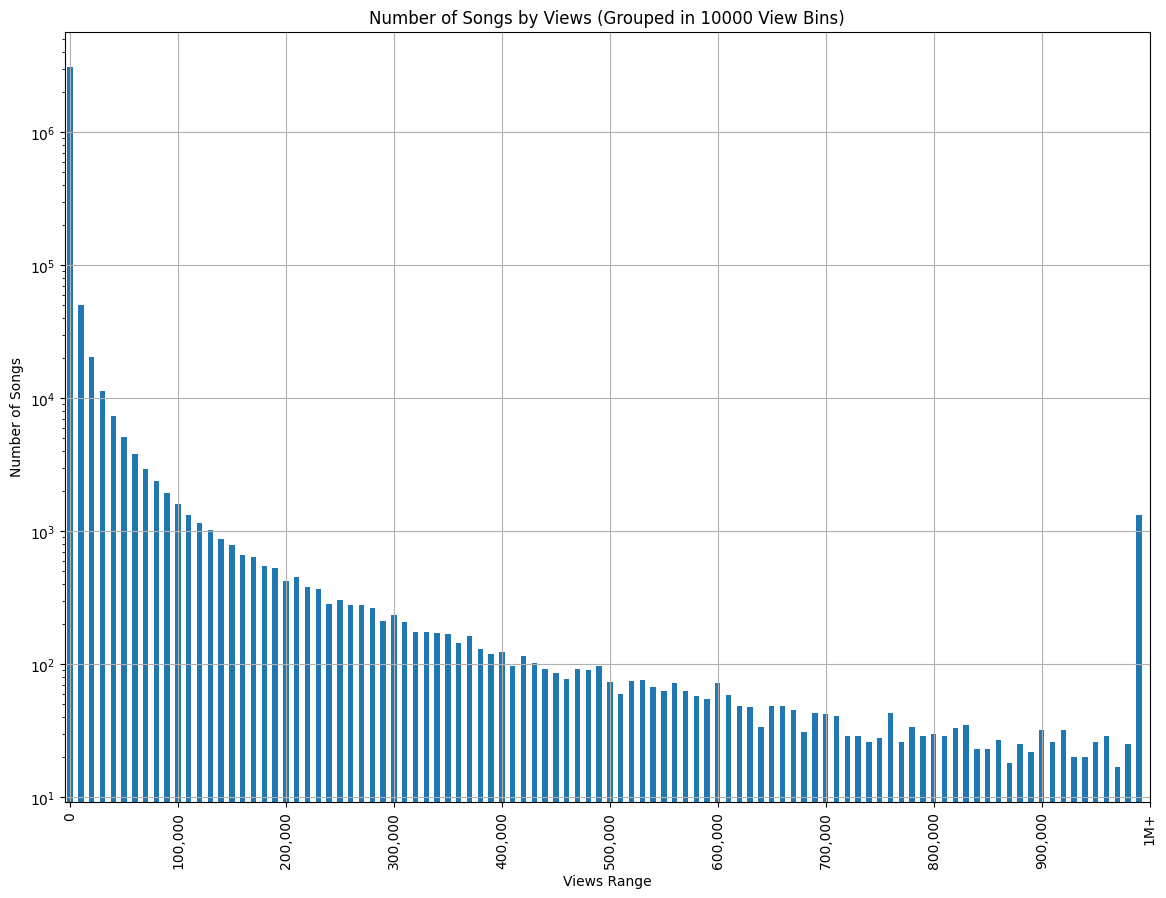

In [ ]:
import matplotlib.pyplot as plt


bins = list(range(0, 1000000, 10000)) + [float('inf')]

plt.figure(figsize=(14, 10))

# Group by the bins and count the number of entries in each bin
df.groupby(
    pd.cut(df['views'], bins=bins, right= True),
    observed= False
).count()['title'].plot(kind= 'bar')

plt.title('Number of Songs by Views (Grouped in 10000 View Bins)')
plt.xlabel('Views Range')
plt.ylabel('Number of Songs')

xticks_positions = list(range(0, len(bins) - 1, 10)) + [len(bins) - 1]  # Every 100,000 and >1M bin
xticks_labels = [f'{x:,}' for x in range(0, 1000000, 100000)] + ['1M+']
plt.xticks(xticks_positions, xticks_labels)
plt.grid()

plt.yscale('log')
plt.show()

/var/folders/68/gjrvx3m51494g9gp2r93j3vh0000gn/T/ipykernel_36724/3949017811.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ].groupby(pd.cut(df['views'], bins=bins, right= True)).count() ['title'].plot(kind= 'bar')


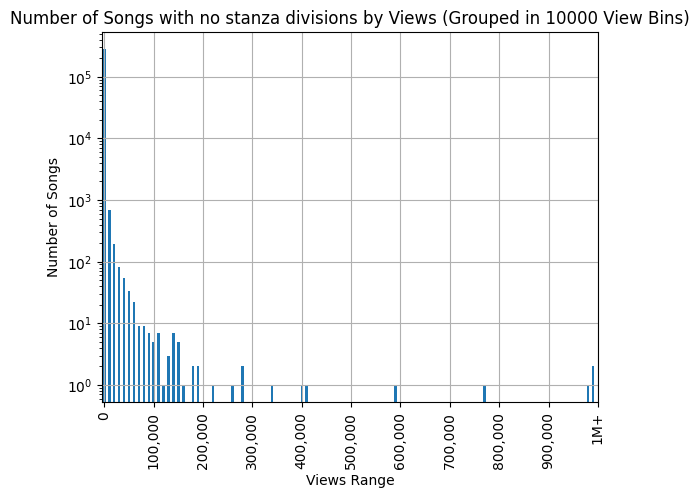

In [ ]:
# 370714 rows do not contain \n\n
# 342434 rows do not contain \n\n and have tag != 'misc'
# 283416 rows do not contain \n\n or [<something>], with tag != 'misc' [removed]
# 
# !!!
# [Bruno] I think we deal with these as if they were a single stanza
# 
# Note : this does not take into account lyrics that start with [<something>]
# and then have no other [...]. this can be a problem in some cases
# e.g: [Produced by <producer>]<unsplit_lyrics>
bins = list(range(0, 1000000, 10000)) + [float('inf')]

df.loc[
   ~(df['lyrics'].str.contains(r'\n\n', na=False)) &
   ~(df['lyrics'].str.contains(r'\[.*\]', na=False))
].groupby(
   pd.cut(df['views'], bins=bins, right= True),
   observed= False
).count() ['title'].plot(kind= 'bar')

plt.title('Number of Songs with no stanza divisions by Views (Grouped in 10000 View Bins)')
plt.xlabel('Views Range')
plt.ylabel('Number of Songs')

plt.xticks(xticks_positions, xticks_labels)
plt.grid()

plt.yscale('log')
plt.show()
# .idxmax()    :     1165287

In [ ]:
# tag
# country      86658
# misc        140977        [now removed]
# pop        1393536
# rap         964538
# rb          155075
# rock        633287
df.groupby('tag').count()['title']

tag
country      86658
pop        1393536
rap         964538
rb          155075
rock        633287
Name: title, dtype: int64

In [ ]:
# check for featurings contained in artist rather than feat
# e.g: Charizma & Peanut Butter Wolf

In [ ]:
# what to do about artists???
# 3 ideas:
# 
# - entity recognition on both artist and feats, map artists to common moods
#   (complex but ideal; I would suggest mentioning this in future developments)
# - use number of artists working on the track
#   (pro: simpler to implement, still gives some information which might
#    be useful; drawback: need to be careful, the dataset is irregular in this,
#    e.g. artists mentioned in the artist category rather than the feats category,
#    further complicated by the existence of groups such as Simon & Garfunkel)

In [ ]:
# explode column tag into is_<genre>
# df = pd.concat(
#     [
#         df,
#         pd.get_dummies(df['tag'], prefix='is', dtype=bool)
#     ], axis=1
# ).drop(columns= 'tag')
# df

,title,artist,year,views,features,lyrics,is_country,is_pop,is_rap,is_rb,is_rock
0,Killa Cam,Cam'ron,2004,173166,"{""Cam\\'ron"",""Opera Steve""}","[Chorus: Opera Steve & Cam'ron]\nKilla Cam, Ki...",False,False,True,False,False
1,Can I Live,JAY-Z,1996,468624,{},"[Produced by Irv Gotti]\n\n[Intro]\nYeah, hah,...",False,False,True,False,False
2,Forgive Me Father,Fabolous,2003,4743,{},Maybe cause I'm eatin\nAnd these bastards fien...,False,False,True,False,False
3,Down and Out,Cam'ron,2004,144404,"{""Cam\\'ron"",""Kanye West"",""Syleena Johnson""}",[Produced by Kanye West and Brian Miller]\n\n[...,False,False,True,False,False
4,Fly In,Lil Wayne,2005,78271,{},"[Intro]\nSo they ask me\n""Young boy\nWhat you ...",False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
3233207,Everything Is Alright Now,Chuck Bernard,2013,2,{},"Everything is alright now\nOh yes, baby\nEvery...",False,True,False,False,False
3233208,White Lies,ElementD,2019,1,"{""Harley Bird""}",[Verse 1]\nHalf truth and half you\nDidn't we ...,False,True,False,False,False
3233209,Ocean,Effemar,2022,3,{},[Verse 1]\nDance for me now\nKeeping yourself ...,False,True,False,False,False
3233210,Raise Our Hands,"Culture Code, Pag & Mylo",2016,3,"{Elex,""Culture Code / Pag & Mylo""}",[Verse 1]\nHere our purpose feels alive\nWe ar...,False,True,False,False,False


In [5]:
# overwrite drop_dataset.csv file
df.to_csv(path + 'drop_dataset.csv', index= False)

In [ ]:
# split stanzas, take into account chorus/verse number
def split_into_stanzas(row):
    stanzas = row['lyrics'].split('\n\n')  # Split by double newlines
    stanza_entries = []
    for stanza in stanzas:
        stanza_entry = row.to_dict()  # Convert all metadata to a dictionary
        stanza_entry['stanza'] = stanza.strip()  # Add the stanza
        stanza_entries.append(stanza_entry)
    return stanza_entries

# Transform the dataframe
stanza_data = []
for _, row in df.iterrows():
    stanza_data.extend(split_into_stanzas(row))  # Extend with stanza dictionaries

# Create a new dataframe with stanzas
stanza_df = pd.DataFrame(stanza_data)

# Drop the original 'lyrics' column (optional)
stanza_df = stanza_df.drop(columns=['lyrics'])

In [ ]:
# for encoding, sentence_transformers.SentenceTransformer
# seems to be the best fit for the task

# simple explanation: this encodes the stanza as a vector
# of real numbers, which can then be passed to models for
# training and classification

# !IMPORTANT: this is the last step of preprocessing
# for both pipelines